<a href="https://colab.research.google.com/gist/SiinaSt/20d0a76f9557109a5de143aa46d3eca1/.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

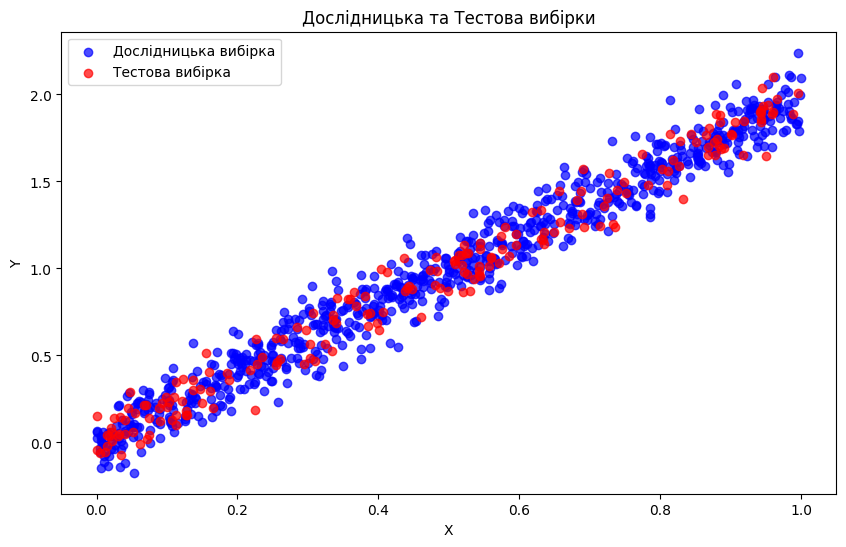

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


X = np.random.rand(1000)
y = 2 * X + np.random.normal(0, 0.1, size=(1000))

data = pd.DataFrame({'X': X.ravel(), 'y': y.ravel()})

data['X'] = (data['X'] - data['X'].min()) / (data['X'].max() - data['X'].min())


X_train, X_test, y_train, y_test = train_test_split(data[['X']], data['y'], test_size=0.2, random_state=42)
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.7, label='Дослідницька вибірка')
plt.scatter(X_test, y_test, color='red', alpha=0.7, label='Тестова вибірка')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Дослідницька та Тестова вибірки')
plt.legend()
plt.show()


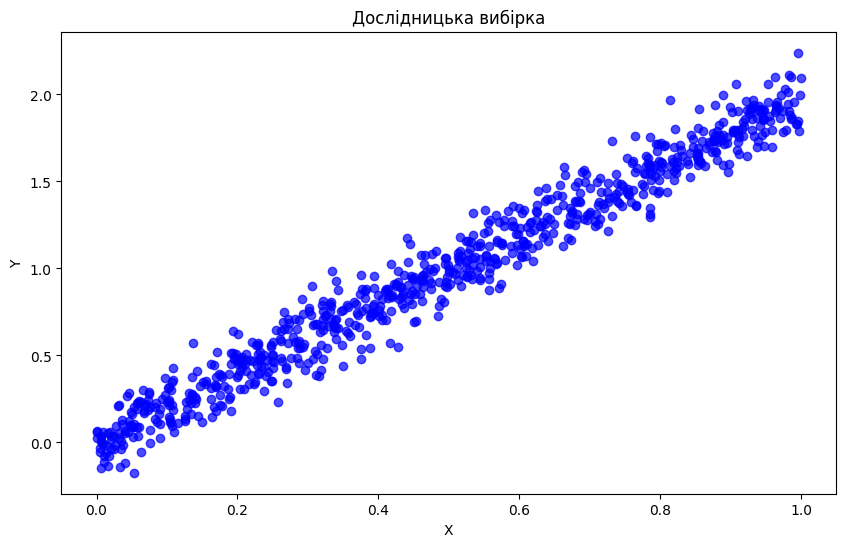

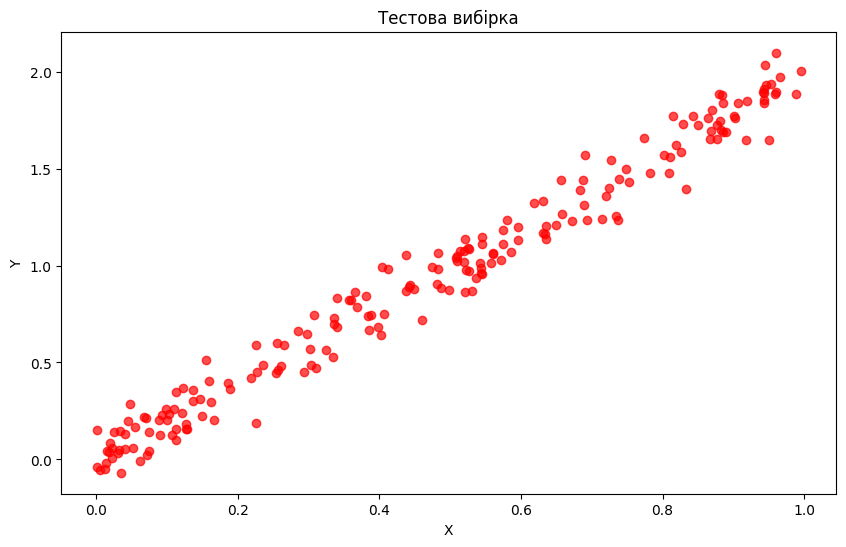

In [ ]:
# Дослідницька вибірка
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Дослідницька вибірка')
plt.show()

# Тестова вибірка
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='red', alpha=0.7)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Tестова вибірка')
plt.show()

Дослідницька вибірка
k= 1
Значення MSE становить: 0.0
Значення R-squaredстановить: 1.0
k= 2
Значення MSE становить: 0.005443862162090451
Значення R-squaredстановить: 0.9840008468690926
k= 3
Значення MSE становить: 0.007457836630120138
Значення R-squaredстановить: 0.9780819082633122
k= 4
Значення MSE становить: 0.00837695143581965
Значення R-squaredстановить: 0.9753806902523801
k= 5
Значення MSE становить: 0.008692446380519364
Значення R-squaredстановить: 0.9744534713438213
k= 6
Значення MSE становить: 0.009151952751234378
Значення R-squaredстановить: 0.9731030123184455
k= 7
Значення MSE становить: 0.009425743214966007
Значення R-squaredстановить: 0.9722983601386882
k= 8
Значення MSE становить: 0.009702420276680257
Значення R-squaredстановить: 0.9714852244371633
k= 9
Значення MSE становить: 0.00996516837708445
Значення R-squaredстановить: 0.9707130250375358
k= 10
Значення MSE становить: 0.010132899150601907
Значення R-squaredстановить: 0.9702200753172142
k= 11
Значення MSE становить: 0.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


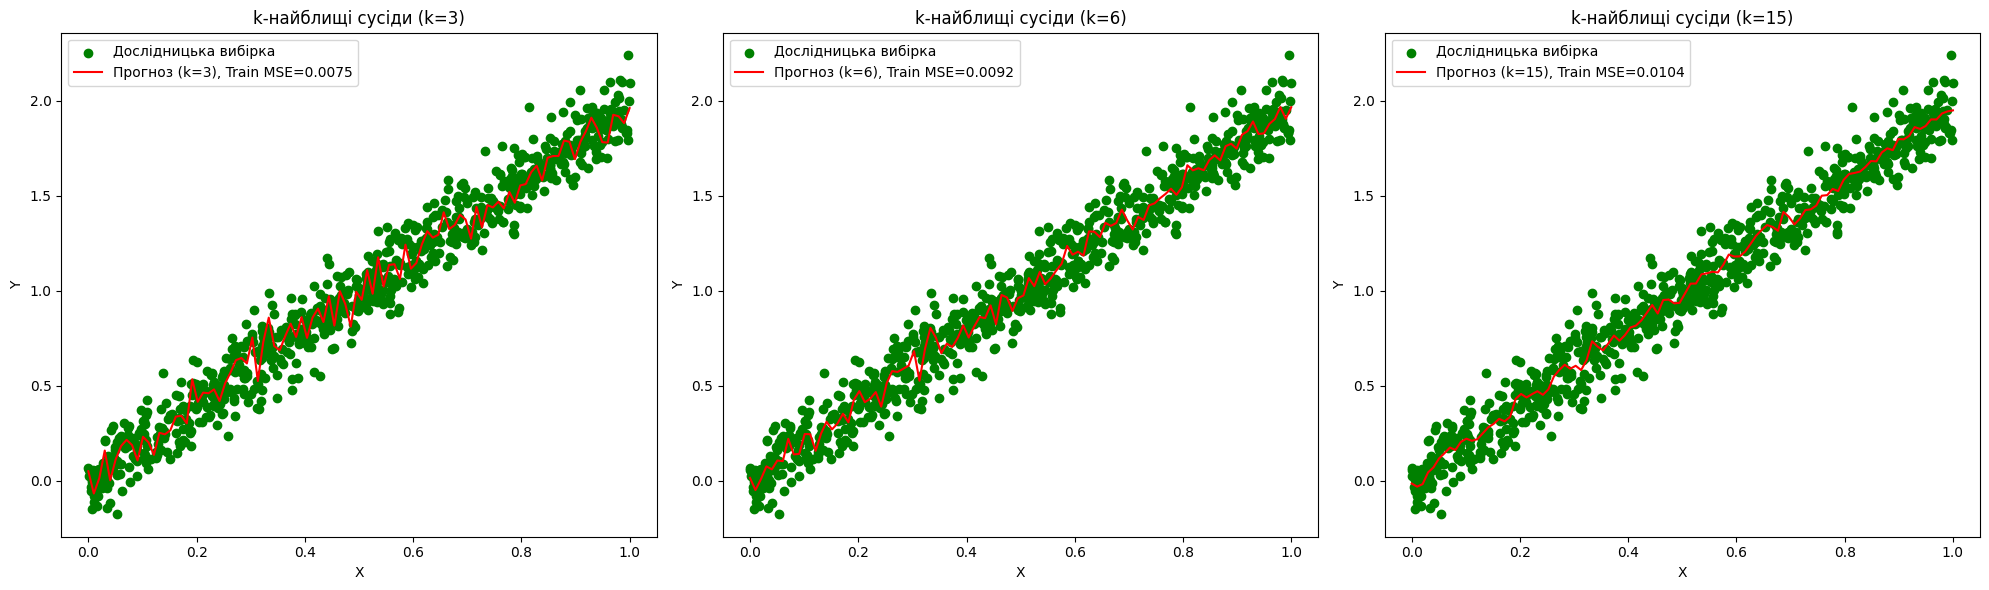

In [ ]:
from sklearn import neighbors
rmse_val=[]

min_mse_k_D= None
min_mse_value_D = float('inf')
max_r2_k_D = None
max_r2_value_D = -float('inf')
print("Дослідницька вибірка")
for K in range(20):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)

    model.fit(X_train, y_train)
    pred = model.predict(X_train)

    mse = mean_squared_error(y_train, pred)
    r2 = r2_score(y_train, pred)
    rmse_val.append(mse)
    print('k=', K,)
    print('Значення MSE становить:', mse)
    print('Значення R-squaredстановить:', r2)

    if mse < min_mse_value_D:
        min_mse_value_D = mse
        min_mse_k_D = K

    if r2 > max_r2_value_D:
        max_r2_value_D = r2
        max_r2_k_D = K

print(f"Найкраща величина K: {min_mse_k_D}, MSE:, {min_mse_value_D:.4f}")
print(f"Найкраща величина K: {max_r2_k_D}, R-squared: {max_r2_value_D:.4f}")

k_values = [3, 6,15]

plt.figure(figsize=(20, 6))

for i, k in enumerate(k_values):

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    X_seq = np.linspace(0, 1, 100).reshape(-1, 1)
    y_pred_seq = knn.predict(X_seq)

    y_pred_train = knn.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)

    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X_train, y_train, color='green', label='Дослідницька вибірка')

    plt.plot(X_seq, y_pred_seq, color='red', label=f'Прогноз (k={k}), Train MSE={mse_train:.4f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'k-найблищі сусіди (k={k})')
    plt.legend()

plt.tight_layout()
plt.show()


Тестова вибірка
k= 1
Значення MSE становить: 0.017953658941091626
Значення R-squaredстановить: 0.9513020122951565
k= 2
Значення MSE становить: 0.01440574838192637
Значення R-squaredстановить: 0.9609254603819792
k= 3
Значення MSE становить: 0.011700189831945557
Значення R-squaredстановить: 0.9682640902085793
k= 4
Значення MSE становить: 0.010883869711332168
Значення R-squaredстановить: 0.9704782988736365
k= 5
Значення MSE становить: 0.010656235605863913
Значення R-squaredстановить: 0.9710957397477039
k= 6
Значення MSE становить: 0.010155347896243927
Значення R-squaredстановить: 0.9724543610518411
k= 7
Значення MSE становить: 0.00974043053741064
Значення R-squaredстановить: 0.9735797940627547
k= 8
Значення MSE становить: 0.009686223012113339
Значення R-squaredстановить: 0.973726828013277
k= 9
Значення MSE становить: 0.009670446281859568
Значення R-squaredстановить: 0.973769621241022
k= 10
Значення MSE становить: 0.009701721032570445
Значення R-squaredстановить: 0.9736847907654856
k= 11
З

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


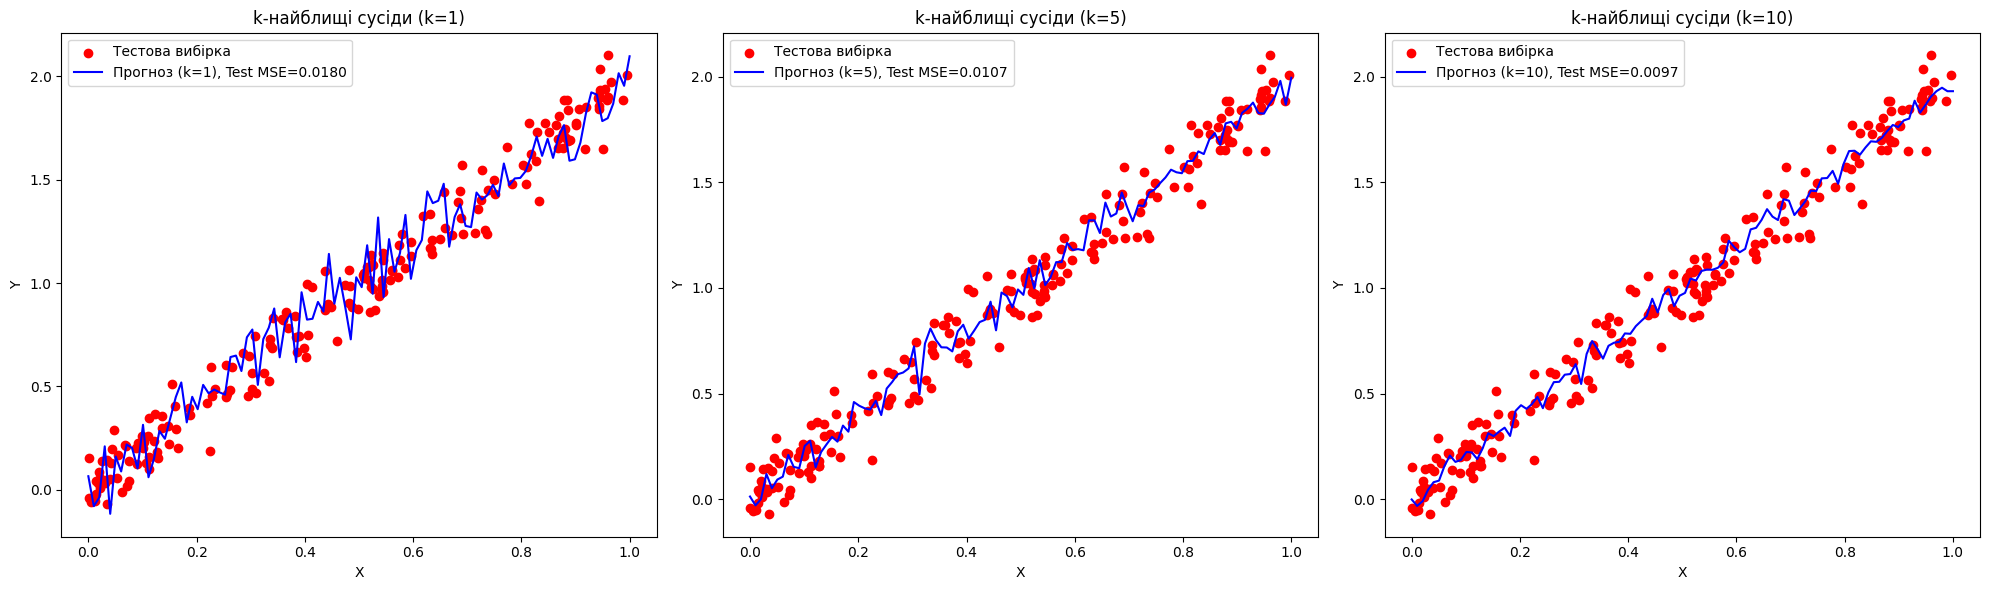

In [ ]:
rmse_val=[]

min_mse_k_T = None
min_mse_value_T = float('inf')
max_r2_k_T = None
max_r2_value_T = -float('inf')

print("Тестова вибірка")
for K in range(20):
    K = K + 1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)

    model.fit(X_train, y_train)
    pred = model.predict(X_test)  # Робимо прогноз на тестовому наборі даних

    mse = mean_squared_error(y_test, pred)  # Розраховуємо MSE
    r2 = r2_score(y_test, pred)  # Розраховуємо коефіцієнт детермінації R-squared
    rmse_val.append(mse)
    print('k=', K)
    print('Значення MSE становить:', mse)
    print('Значення R-squaredстановить:', r2)

    if mse < min_mse_value_T:
        min_mse_value_T = mse
        min_mse_k_T = K

    if r2 > max_r2_value_T:
        max_r2_value_T = r2
        max_r2_k_T= K

print(f"Найкраща величина K: {min_mse_k_T}, MSE:, {min_mse_value_T:.4f}")
print(f"Найкраща величина K: {max_r2_k_T}, R-squared: {max_r2_value_T:.4f}")

k_values = [1, 5,10]

plt.figure(figsize=(20, 6))

for i, k in enumerate(k_values):

    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    X_seq = np.linspace(0, 1, 100).reshape(-1, 1)
    y_pred_seq = knn.predict(X_seq)

    y_pred_train = knn.predict(X_train)
    mse_train = mean_squared_error(y_train, y_pred_train)

    y_pred_test = knn.predict(X_test)
    mse_test = mean_squared_error(y_test, y_pred_test)

    plt.subplot(1, len(k_values), i + 1)
    plt.scatter(X_test, y_test, color='red', label='Тестова вибірка')

    plt.plot(X_seq, y_pred_seq, color='blue', label=f'Прогноз (k={k}), Test MSE={mse_test:.4f}')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'k-найблищі сусіди (k={k})')
    plt.legend()

plt.tight_layout()
plt.show()
